In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## 필요한 모듈 및 한글 글꼴 지정하기

In [5]:
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

## 확보된 데이터(CSV파일)을 데이터프레임으로 읽어오기

In [51]:
# read_csv 파일을 읽을 시 skiprows 데이터프레임에 대해 넘길 때 사용
df = pd.read_csv('./data/ta_20211110172707.csv', encoding='cp949', skiprows=7)
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1980-01-01,108,3.8,0.5,6.6
1,1980-01-02,108,4.7,3.5,5.9
2,1980-01-03,108,3.8,-0.5,6.2
3,1980-01-04,108,-3.2,-6.9,-0.5
4,1980-01-05,108,-5.3,-9.1,-1.0


## 특정일(자신의 생일)에 해당하는 기온 그래프를 그리기

<AxesSubplot:>

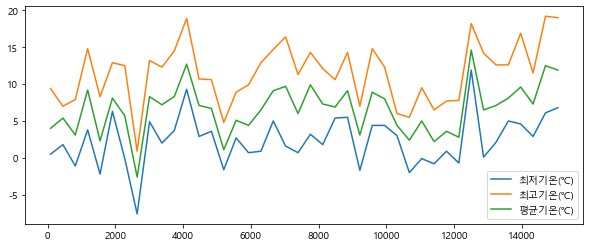

In [7]:
birth = df[df['날짜'].str.contains('-03-25')]
# NaN 행 제거
birth = birth[birth['평균기온(℃)'].notnull()]
birth[['최저기온(℃)', '최고기온(℃)', '평균기온(℃)']].plot(figsize=(10,4))



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       15289 non-null  object 
 1   지점       15289 non-null  int64  
 2   평균기온(℃)  15289 non-null  float64
 3   최저기온(℃)  15289 non-null  float64
 4   최고기온(℃)  15288 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 597.4+ KB


In [9]:
import datetime

birth_x = []
birth.날짜 = pd.to_datetime(birth.날짜)
for i in birth.날짜.dt.year:
    birth_x.append(i)
birth.set_index('날짜', inplace=True)

In [10]:
birth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 1980-03-25 to 2021-03-25
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지점       42 non-null     int64  
 1   평균기온(℃)  42 non-null     float64
 2   최저기온(℃)  42 non-null     float64
 3   최고기온(℃)  42 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.6 KB


## 지금까지의 최고 기온을 확인

- 빅데이터 분석을 위한 Story line, 분석 로직
- Assumption 1 : 최고기온이 높은 날이 평균기온 높은 날과 같은지 분석
- Assumption 2 : 평균기온이 높으면 최고기온이 영향을 받는가?
- Assumption 3 : 최고기온이 높으면 최저기온은 어떤 영향을 가지고 있는가?
- Assumption 4 : 최저기온이 낮으면 최고기온의 영향은 어떤지 분석
- Assumption 5 : 최저기온이 낮으면 최고기온도 낮은가?
- Assumption 6 : 최저기온이 낮으면 평균기온도 낮은가? => 어떤 관계가 있는가? => 관계성 분석
- Assumption 7 : 일교차가 가장 큰 날은 어느 날인가?
- Assumption 8 : 일교차가 크게 발생한 년도는 언제인가?

In [13]:
maxtemp = df.iloc[[df['최고기온(℃)'].idxmax()]]
maxtemp

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
14092,2018-08-01,108,33.6,27.8,39.6


In [17]:
df.iloc[[df['최고기온(℃)'].idxmax()]]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
14092,2018-08-01,108,33.6,27.8,39.6


In [23]:
df.iloc[[df['최고기온(℃)'].idxmin()]]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
2196,1986-01-05,108,-16.4,-19.2,-13.6


In [19]:
df.iloc[[df['평균기온(℃)'].idxmax()]]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
14093,2018-08-02,108,33.7,30.3,37.9


In [20]:
df.iloc[[df['평균기온(℃)'].idxmin()]]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
2196,1986-01-05,108,-16.4,-19.2,-13.6


In [21]:
df.iloc[[df['최저기온(℃)'].idxmax()]]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
14093,2018-08-02,108,33.7,30.3,37.9


In [22]:
df.iloc[[df['최저기온(℃)'].idxmin()]]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
2196,1986-01-05,108,-16.4,-19.2,-13.6


## 아래 코드로 년도, 10년 단위 그룹, 월, 계절 열(column)을 추가

In [65]:
# [Sample 1]

# 10년 단위로 데이터 분할하기
# 월을 구분하기
# 계절을 여름으로 구분하기 - 봄, 여름, 가을, 겨울 또는 겨울, 봄, 여름, 가을
# 계절을 코드화 해서 분석하기 - 0:겨울, 1:봄, 2:여름, 3:가을


# 원래 방법
df1 = df.copy()
# 날짜를 잘라서 년도만 가져오기
df1['년도'] = df1['날짜'].str.slice(0,4).astype(int)
# 10년 단위 그룹으로 나누기
df1['그룹'] = df1['년도'] // 10 * 10
# 월 추가
df1['월'] = df1['날짜'].str.slice(5,7).astype(int)
# 월을 계절로 바꾸기, 0:겨울, 1:봄, 2:여름, 3:가을
df1['계절'] = (df1['월'] // 3) % 4
df1.loc[df1['계절'] == 0, '계절'] = '겨울'
df1.loc[df1['계절'] == 1, '계절'] = '봄'
df1.loc[df1['계절'] == 2, '계절'] = '여름'
df1.loc[df1['계절'] == 3, '계절'] = '가을'
df1

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),년도,그룹,월,계절
0,1980-01-01,108,3.8,0.5,6.6,1980,1980,1,겨울
1,1980-01-02,108,4.7,3.5,5.9,1980,1980,1,겨울
2,1980-01-03,108,3.8,-0.5,6.2,1980,1980,1,겨울
3,1980-01-04,108,-3.2,-6.9,-0.5,1980,1980,1,겨울
4,1980-01-05,108,-5.3,-9.1,-1.0,1980,1980,1,겨울
...,...,...,...,...,...,...,...,...,...
15284,2021-11-05,108,13.0,7.8,20.2,2021,2020,11,가을
15285,2021-11-06,108,14.1,8.8,21.3,2021,2020,11,가을
15286,2021-11-07,108,15.3,9.7,21.3,2021,2020,11,가을
15287,2021-11-08,108,8.6,4.5,15.5,2021,2020,11,가을


<AxesSubplot:title={'center':'최고기온(℃)'}, xlabel='그룹'>

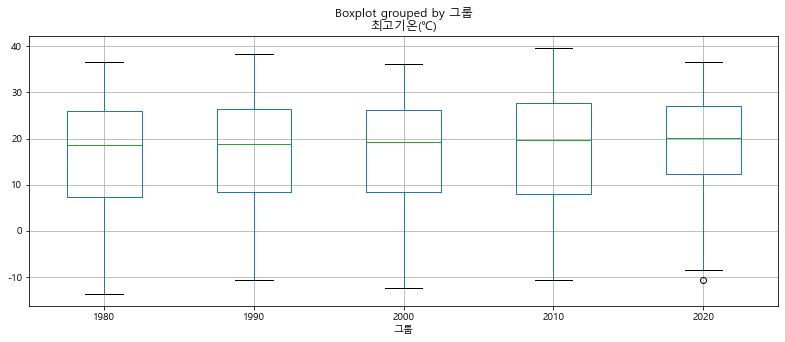

In [56]:
df1.boxplot(column='최고기온(℃)', by='그룹', figsize=(13, 5))

○ 분석
- 1990 년 평균적으로 온도가 낮았다. 18도 정도로 관측되었으며, 2000년, 2010년, 2020년 대비 약 1~2도의 편차를 보였다.
- 데이터 분석결과, 1990년대의 대기상태와 대기 오염상태가 상대적으로 덜하고 2000년부터 평균 온도가 상승하고 있을을 알 수 있다.

In [57]:
# 수정방법
df1 = df.copy()
df1.날짜 = pd.to_datetime(df1.날짜)
df1['월'] = df1.날짜.dt.month
df1['계절'] = pd.cut( df1.월, bins=[0,2,5,8,11,14], labels=['겨울','봄','여름','가을','겨울'], ordered=False)
df1.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),월,계절
0,1980-01-01,108,3.8,0.5,6.6,1,겨울
1,1980-01-02,108,4.7,3.5,5.9,1,겨울
2,1980-01-03,108,3.8,-0.5,6.2,1,겨울
3,1980-01-04,108,-3.2,-6.9,-0.5,1,겨울
4,1980-01-05,108,-5.3,-9.1,-1.0,1,겨울


<AxesSubplot:title={'center':'최고기온(℃)'}, xlabel='계절'>

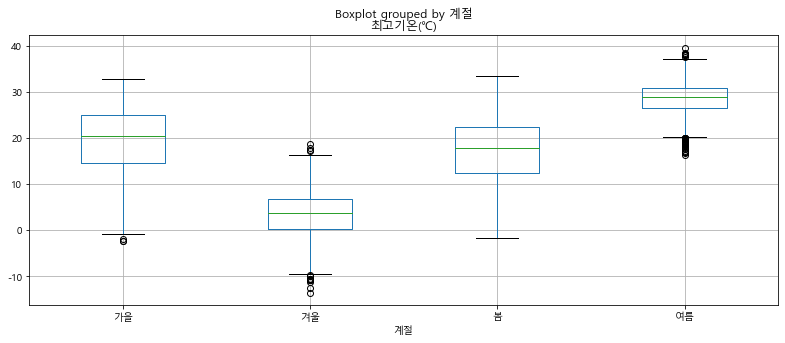

In [58]:
df1.boxplot(column='최고기온(℃)', by='계절', figsize=(13, 5))

<AxesSubplot:title={'center':'최고기온(℃)'}, xlabel='월'>

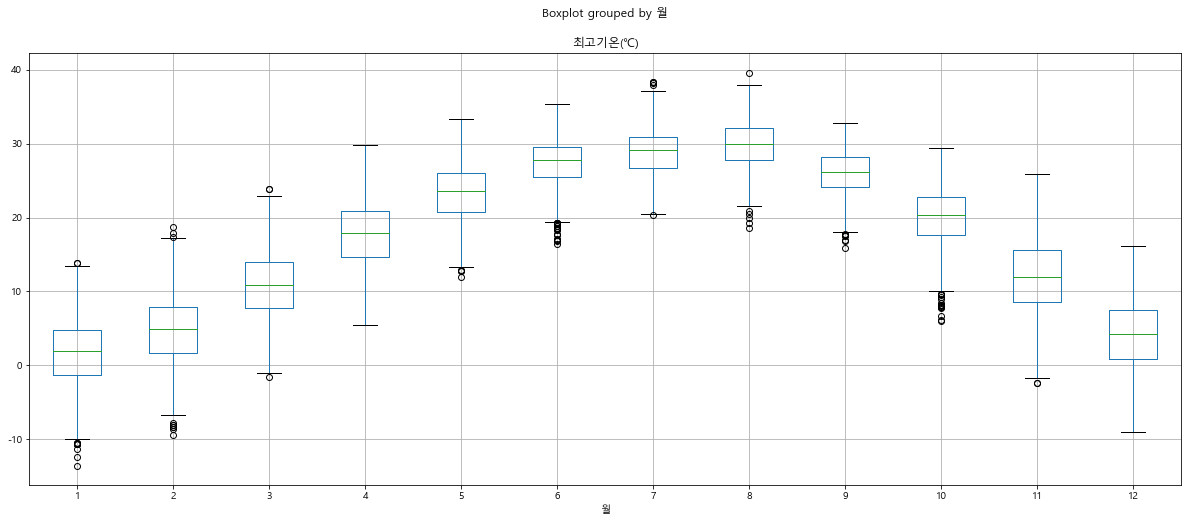

In [61]:
df1.boxplot(column='최고기온(℃)', by='월', figsize=(20, 8))

○ 분석 결과
- 월간 기온 데이터 분석결과 4월과 12월이 이상치가 발견되지 않아 기온이 상대적으로 안정적인 기온이 관측되고 있다.
- 서울지역은 여름 기온은 최고기온의 일정함이 관측되었다.

In [62]:
df1['일교차'] = df1['최고기온(℃)'] - df1['최저기온(℃)']
df1

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),월,계절,일교차
0,1980-01-01,108,3.8,0.5,6.6,1,겨울,6.1
1,1980-01-02,108,4.7,3.5,5.9,1,겨울,2.4
2,1980-01-03,108,3.8,-0.5,6.2,1,겨울,6.7
3,1980-01-04,108,-3.2,-6.9,-0.5,1,겨울,6.4
4,1980-01-05,108,-5.3,-9.1,-1.0,1,겨울,8.1
...,...,...,...,...,...,...,...,...
15284,2021-11-05,108,13.0,7.8,20.2,11,가을,12.4
15285,2021-11-06,108,14.1,8.8,21.3,11,가을,12.5
15286,2021-11-07,108,15.3,9.7,21.3,11,가을,11.6
15287,2021-11-08,108,8.6,4.5,15.5,11,가을,11.0


<AxesSubplot:title={'center':'일교차'}, xlabel='월'>

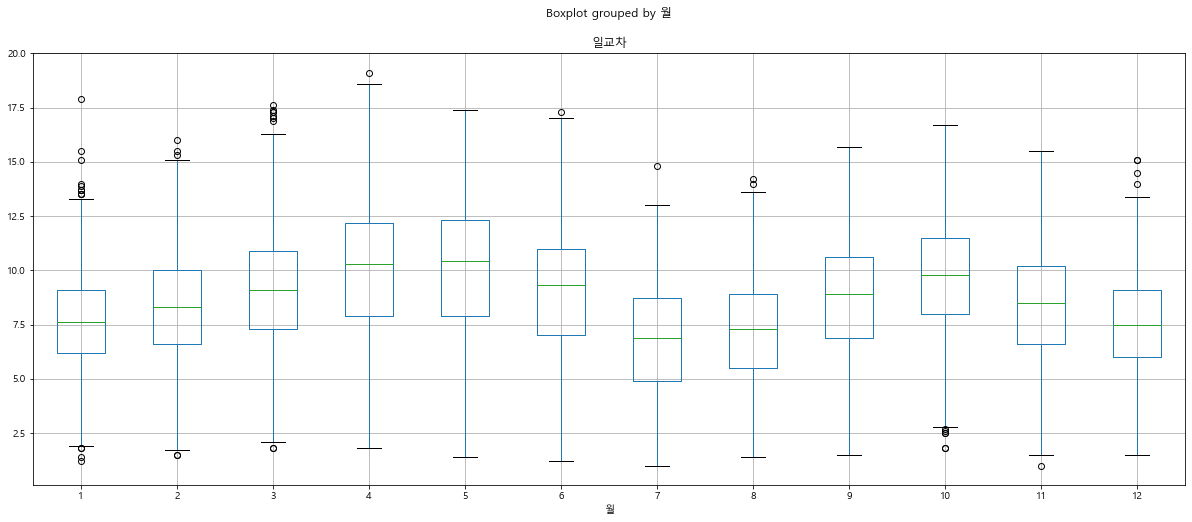

In [63]:
df1.boxplot(column='일교차', by='월', figsize=(20, 8))

In [66]:
df1

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),년도,그룹,월,계절
0,1980-01-01,108,3.8,0.5,6.6,1980,1980,1,겨울
1,1980-01-02,108,4.7,3.5,5.9,1980,1980,1,겨울
2,1980-01-03,108,3.8,-0.5,6.2,1980,1980,1,겨울
3,1980-01-04,108,-3.2,-6.9,-0.5,1980,1980,1,겨울
4,1980-01-05,108,-5.3,-9.1,-1.0,1980,1980,1,겨울
...,...,...,...,...,...,...,...,...,...
15284,2021-11-05,108,13.0,7.8,20.2,2021,2020,11,가을
15285,2021-11-06,108,14.1,8.8,21.3,2021,2020,11,가을
15286,2021-11-07,108,15.3,9.7,21.3,2021,2020,11,가을
15287,2021-11-08,108,8.6,4.5,15.5,2021,2020,11,가을


In [67]:
df1.columns=['날짜','지점','mean','min','max','년도','그룹','월','계절']
df1

,날짜,지점,mean,min,max,년도,그룹,월,계절
0,1980-01-01,108,3.8,0.5,6.6,1980,1980,1,겨울
1,1980-01-02,108,4.7,3.5,5.9,1980,1980,1,겨울
2,1980-01-03,108,3.8,-0.5,6.2,1980,1980,1,겨울
3,1980-01-04,108,-3.2,-6.9,-0.5,1980,1980,1,겨울
4,1980-01-05,108,-5.3,-9.1,-1.0,1980,1980,1,겨울
...,...,...,...,...,...,...,...,...,...
15284,2021-11-05,108,13.0,7.8,20.2,2021,2020,11,가을
15285,2021-11-06,108,14.1,8.8,21.3,2021,2020,11,가을
15286,2021-11-07,108,15.3,9.7,21.3,2021,2020,11,가을
15287,2021-11-08,108,8.6,4.5,15.5,2021,2020,11,가을


In [68]:
df1['일교차'] = df1['max'] - df1['min']
df1

,날짜,지점,mean,min,max,년도,그룹,월,계절,일교차
0,1980-01-01,108,3.8,0.5,6.6,1980,1980,1,겨울,6.1
1,1980-01-02,108,4.7,3.5,5.9,1980,1980,1,겨울,2.4
2,1980-01-03,108,3.8,-0.5,6.2,1980,1980,1,겨울,6.7
3,1980-01-04,108,-3.2,-6.9,-0.5,1980,1980,1,겨울,6.4
4,1980-01-05,108,-5.3,-9.1,-1.0,1980,1980,1,겨울,8.1
...,...,...,...,...,...,...,...,...,...,...
15284,2021-11-05,108,13.0,7.8,20.2,2021,2020,11,가을,12.4
15285,2021-11-06,108,14.1,8.8,21.3,2021,2020,11,가을,12.5
15286,2021-11-07,108,15.3,9.7,21.3,2021,2020,11,가을,11.6
15287,2021-11-08,108,8.6,4.5,15.5,2021,2020,11,가을,11.0
